# Dask DataFrame

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы: 
* Макрушин С.В. Лекция "Dask DataFrame"
* https://docs.dask.org/en/latest/dataframe.html
* Jesse C. Daniel. Data Science with Python and Dask. 

* https://docs.dask.org/en/stable/generated/dask.dataframe.DataFrame.memory_usage_per_partition.html#dask.dataframe.DataFrame.memory_usage_per_partition
* https://docs.dask.org/en/stable/generated/dask.dataframe.DataFrame.map_partitions.html#dask.dataframe.DataFrame.map_partitions
* https://docs.dask.org/en/stable/generated/dask.array.histogram.html
* https://docs.dask.org/en/stable/dataframe-categoricals.html
* https://docs.dask.org/en/stable/generated/dask.dataframe.DataFrame.pivot_table.html#dask.dataframe.DataFrame.pivot_table
* https://docs.dask.org/en/stable/generated/dask.dataframe.groupby.DataFrameGroupBy.apply.html
* https://docs.dask.org/en/stable/generated/dask.dataframe.Series.map_overlap.html#dask.dataframe.Series.map_overlap

* https://docs.dask.org/en/stable/best-practices.html
* https://docs.dask.org/en/stable/dashboard.html
* https://distributed.dask.org/en/stable/client.html

## Задачи для совместного разбора

In [1]:
import dask

In [2]:
dask.__version__

'2022.11.1'

In [ ]:
!pip install --uder distributed==22.01.2022

1\. Создать `dask.DataFrame`. Рассмотреть основные возможности (выбор строк, группировки, работа с датами, добавление столбцов)

In [3]:
df = dask.datasets.timeseries(start='2000-01-01', end='2003-10-10')
df

,name,id,x,y
npartitions=1378,,,,
2000-01-01,object,int32,float64,float64
2000-01-02,...,...,...,...
...,...,...,...,...
2003-10-09,...,...,...,...
2003-10-10,...,...,...,...


In [5]:
df['xy'] = df['x'] + df['y']
df.head(5)

,name,id,x,y,xy
timestamp,,,,,
2000-01-01 00:00:00,Dan,972,0.038429,0.698606,0.737035
2000-01-01 00:00:01,Alice,1007,-0.597131,0.842149,0.245018
2000-01-01 00:00:02,Zelda,897,0.857142,-0.358859,0.498283
2000-01-01 00:00:03,Zelda,1018,0.135542,-0.363666,-0.228124
2000-01-01 00:00:04,Oliver,982,0.588954,0.385420,0.974373


In [7]:
df[df['name']=='Edith'].head(5)

,name,id,x,y,xy
timestamp,,,,,
2000-01-01 00:01:18,Edith,984,0.877419,-0.965981,-0.088562
2000-01-01 00:01:43,Edith,974,0.083843,0.492400,0.576242
2000-01-01 00:01:50,Edith,999,0.949759,-0.301551,0.648208
2000-01-01 00:01:52,Edith,1023,-0.170235,-0.664216,-0.834451
2000-01-01 00:02:14,Edith,1000,-0.406753,0.434684,0.027931


2\. Рассмотреть средства диагностики `dask`

In [ ]:
from dask.diagnostics import ProgressBar

In [ ]:
from dask.distributed import Client

3\. Изучить, как влияет вызов `persist` на производительность

In [ ]:
female = {"Edith", "Wendy", "Quinn", "Hannah", "Ursula", "Laura", "Sarah", "Alice"}

## Лабораторная работа 13

__При решении данных задач не подразумевается использования циклов или генераторов Python в ходе работы с пакетами `numpy`, `pandas` и `dask`, если в задании не сказано обратного. Решения задач, в которых для обработки массивов `numpy`, структур `pandas` или структур `dask` используются явные циклы (без согласования с преподавателем), могут быть признаны некорректными и не засчитаны.__

In [2]:
import dask.dataframe as dd
from dask.diagnostics import ProgressBar
# from dask.distributed import Client

import numpy as np
import re
import dask.array as da
import matplotlib.pyplot as plt

В ходе выполнения все операции вычислений проводятся над `dask.DataFrame` и средствами пакета `dask`, если в задании не сказано обратного. Переход от `dask.DataFrame` к `pd.DataFrame` возможен исключительно для демонстрации результата в конце решения задачи. Если в задаче используются результаты выполнения предыдущих задач, то подразумевается, что вы используете результаты в виде `dask.DataFrame` (то есть то, что было получено до вызова `compute`, а не после).

**1\.** В архиве `recipes_full.zip` находятся файлы, содержащие информацию об рецептах блюд. Загрузите данные из файлов этого архива в виде `dd.DataFrame` с названием `recipes`. Укажите, что в столбце `submitted` содержатся даты. Выведите на экран информацию о количестве сегментов и типе столбцов. Выведите на экран 5 первых и 5 последних строк таблицы. В случае сообщения об ошибке объясните причину и исправьте ошибку.

In [4]:
recipes_full_df = dd.read_csv('C:/Users/micha/Downloads/recipes_full/recipes_full_*.csv',
                             assume_missing=True)
recipes_full_df.submitted = recipes_full_df.submitted.astype('M8[us]')

Описание типов столбцов

In [5]:
recipes_full_df.dtypes

id                       float64
name                      object
minutes                  float64
contributor_id           float64
submitted         datetime64[ns]
n_steps                  float64
description               object
n_ingredients            float64
dtype: object

Количество сегментов в DataFrame

In [6]:
recipes_full_df.npartitions

8

In [7]:
recipes_full_df.head(5)

,id,name,minutes,contributor_id,submitted,n_steps,description,n_ingredients
0,683970.0,vant ivoire mickies nothing,33.0,803776.0,2019-08-22,4.0,pat and gina neely and their family own and op...,9.0
1,1089012.0,kremsils mariposa baccala cookies class borage...,23.0,51579.0,2013-03-02,1.0,"a light, tasty and easy to put together chicke...",5.0
2,1428572.0,tania lander,0.0,68884.0,1980-11-09,1.0,a delicious melt in your mouth appetizer. for ...,5.0
3,1400250.0,heloise milli asher doogh zojirushi,24.0,678862.0,2018-04-29,3.0,delicious cream cheese and peach filled cresce...,1.0
4,387709.0,nutty chocolate chunk cookies,47.0,489552.0,2009-08-31,8.0,everyone loves these buttery cookies chock ful...,10.0


In [8]:
recipes_full_df.tail(5)

,id,name,minutes,contributor_id,submitted,n_steps,description,n_ingredients
278949,1029131.0,tuti waffle snackies steakhouse,19.0,171345.0,1973-10-18,4.0,"according to a providence journal article, ama...",4.0
278950,1700703.0,noelias cheats crocante fleisch zitumbuwa,1.0,30228.0,2007-07-01,6.0,if possible sauté the onions and garlic in abo...,1.0
278951,1910650.0,rubbed restuffed pelmeni bedouin flavourful,60.0,591905.0,2009-09-26,3.0,another great recipe to add to the growing swe...,2.0
278952,713836.0,stems polpettine peezi,NaN,357389.0,2003-09-30,4.0,adapted from top secret recipes. love this!,9.0
278953,660699.0,clementines,64.0,29196.0,1973-06-03,6.0,this would make a great start to your holiday ...,8.0


**2\.** Выведите на экран следующую информацию:
* количество сегментов в таблице
* объем используемой памяти каждого сегмента
* количество строк в каждом сегменте
* количество строк во всей таблице.

In [9]:
recipes_full_df.npartitions

8

In [10]:
recipes_full_df.memory_usage_per_partition().compute()

0    17853248
1    17853248
2    17853248
3    17853248
4    17853248
5    17853184
6    17853184
7    17853184
dtype: int64

In [11]:
recipes_full_df.map_partitions(len).compute()

0    278955
1    278955
2    278955
3    278955
4    278955
5    278954
6    278954
7    278954
dtype: int64

In [12]:
recipes_full_df.shape[0].compute()

2231637

**3\.** В архиве `recipes_additional.zip` находятся файлы, содержащие информацию об рецептах блюд, полученные из другого источника. В связи с этим названия и количество столбцов в этих данных отличаются от того, что находится в архиве `recipes_full.zip`.

Объедините два набора набора данных, согласовав названия столбцов и форматы данных. Добавьте столбец с информацией о том, из какого датасета была получены данные.

In [13]:
recipes_additional_df = dd.read_csv('C:/Users/micha/Downloads/recipes_additional/recipes_additional_*.csv',
                                    assume_missing=True,
                                    dtype={'#tags': 'object',
                                           'n_steps': 'float64'})

In [14]:
recipes_additional_df.date_of_publication = recipes_additional_df.date_of_publication.astype('M8[us]')

К каждому фрейму добавим столбец `recipe_source`

In [15]:
recipes_additional_df['recipe_source'] = 'recipes_additional'
recipes_full_df['recipe_source'] = 'recipes_full'

Переведем столбец `hours` в `minutes`

In [16]:
recipes_additional_df['hours'] = recipes_additional_df.hours.apply(lambda x: x*60, meta=('hours', 'float64'))

Переименуем столбцы `recipes_additional_df`, чтобы они совпадали со столбцами `recipes_full_df`

In [17]:
recipes_additional_df = recipes_additional_df.rename(columns={'recipe_id':'id',
                                                              'hours':'minutes',
                                                              'date_of_publication':'submitted',
                                                              '#ingredients':'n_ingredients'})

In [18]:
comlete_recipes_df = dd.concat([recipes_full_df, recipes_additional_df])

In [19]:
comlete_recipes_df.head()

,id,name,minutes,contributor_id,submitted,n_steps,description,n_ingredients,recipe_source,#tags,views_30_days
0,683970,vant ivoire mickies nothing,33.0,803776.0,2019-08-22,4.0,pat and gina neely and their family own and op...,9.0,recipes_full,NaN,NaN
1,1.08901e+06,kremsils mariposa baccala cookies class borage...,23.0,51579.0,2013-03-02,1.0,"a light, tasty and easy to put together chicke...",5.0,recipes_full,NaN,NaN
2,1.42857e+06,tania lander,0.0,68884.0,1980-11-09,1.0,a delicious melt in your mouth appetizer. for ...,5.0,recipes_full,NaN,NaN
3,1.40025e+06,heloise milli asher doogh zojirushi,24.0,678862.0,2018-04-29,3.0,delicious cream cheese and peach filled cresce...,1.0,recipes_full,NaN,NaN
4,387709,nutty chocolate chunk cookies,47.0,489552.0,2009-08-31,8.0,everyone loves these buttery cookies chock ful...,10.0,recipes_full,NaN,NaN


In [20]:
comlete_recipes_df.dtypes

id                        object
name                      object
minutes                  float64
contributor_id           float64
submitted         datetime64[ns]
n_steps                  float64
description               object
n_ingredients            float64
recipe_source             object
#tags                     object
views_30_days            float64
dtype: object

**4\.** Выясните, сколько рецептов содержат слово `chocolate`. Выведите на экран набор уникальных идентификаторов авторов таких рецептов.

Для `comlete_recipes_df` при любой попытке сделать `compute` выдаёт ошибку:
```
ValueError: The columns in the computed data do not match the columns in the provided metadata
  Extra:   ['n_steps']
  Missing: []
```
Хотя бы для собственного понимания сделал для `recipe_full_df` 

In [23]:
np.where(recipes_full_df['name'].str.extract(r"(.*chocolate.*)",flags=re.IGNORECASE).isnull()==False)[0].size

11628

Выведем первые 100 идентификаторов, содержащих в названии рецепта слово `chocolate`

In [25]:
np.where(recipes_full_df['name'].str.extract(r"(.*chocolate.*)",flags=re.IGNORECASE).isnull()==False)[0][:100]

array([    4,   258,   407,   836,   911,  1240,  1642,  2374,  2473,
        2985,  3586,  3864,  3994,  4280,  4399,  4480,  4558,  4761,
        5209,  5220,  5412,  5664,  6142,  6248,  6396,  6436,  6599,
        6614,  6702,  6947,  6988,  7397,  7700,  7778,  7957,  8251,
        8438,  8521,  8539,  8550,  9023,  9159,  9531,  9559,  9996,
       10065, 10864, 11841, 11992, 12033, 12152, 12268, 12371, 12481,
       12567, 13135, 13234, 13738, 14188, 14306, 14362, 14445, 14571,
       14624, 15314, 15528, 15720, 15811, 15823, 15938, 16126, 16689,
       16703, 16924, 16970, 17020, 17033, 17133, 17519, 17638, 18262,
       18695, 18822, 18904, 18998, 19646, 20021, 20057, 20357, 20449,
       20824, 20996, 21011, 21034, 21149, 21309, 21834, 21876, 21889,
       22302], dtype=int64)

**5\.** При помощи функции `da.histogram` посчитайте значения для построения гистограммы для столбца `n_ingredients`. Визуализируйте полученные результаты при помощи функции `plt.bar`. Добавьте на рисунок 2 вертикальные линии, соответствующие квантилям уровней 0.25 и 0.75. Сделайте масштаб вертикальной оси логарифмическим.

Допускается вычисление статистики по столбцу (применение метода `compute`) до того, как будет вызван `da.histogram`. 

In [21]:
# da.histogram(da.array(comlete_recipes_df['n_ingredients'].compute()))

Для `comlete_recipes_df` при любой попытке сделать `compute` выдаёт ошибку:
```
ValueError: The columns in the computed data do not match the columns in the provided metadata
  Extra:   ['n_steps']
  Missing: []
```
Сделал для `recipe_full_df` 

In [26]:
h, bins = da.histogram(da.array(recipes_full_df['n_ingredients']),
                       bins=11,
                       range=[recipes_full_df['n_ingredients'].min(), recipes_full_df['n_ingredients'].max()])

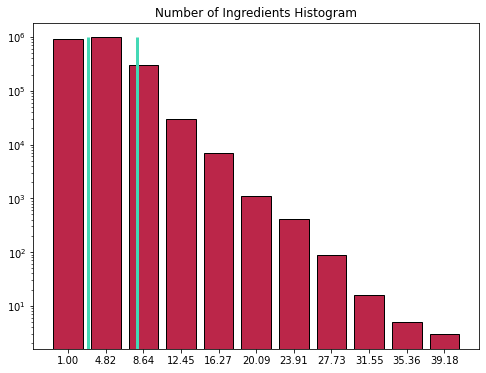

In [27]:
plt.figure(figsize=(8,6))
plt.title('Number of Ingredients Histogram')

b, hight = bins[:11].compute(), h.compute()

plt.bar(b, hight, edgecolor="black", width=3, color='#bb2649')

plt.vlines(recipes_full_df['n_ingredients'].quantile(0.25).compute(), 0, max(hight), color='#44d9b6', lw=3)
plt.vlines(recipes_full_df['n_ingredients'].quantile(0.75).compute(), 0, max(hight), color='#44d9b6', lw=3)

plt.xticks(b)
plt.yscale('log')
plt.show()

**6\.** Постройте сводную таблицу при помощи метода `pivot_table`, где по строкам располагаются года, по столбцам - названия месяцев, а в ячейках содержится средняя длина рецептов в данный год и месяц.

In [67]:
recipes_full_df['year'] = recipes_full_df['submitted'].dt.year
recipes_full_df['month'] = recipes_full_df['submitted'].dt.month

In [68]:
recipes_full_df = recipes_full_df.categorize(columns=['month'])

In [71]:
dd.pivot_table(df=recipes_full_df,
               values='description',
               index='year',
               columns='month',
               aggfunc='mean')

,1,2,3,4,5,6,7,8,9,10,11,12
npartitions=1,,,,,,,,,,,,
,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
,...,...,...,...,...,...,...,...,...,...,...,...


**7\.** Удалите строки, которые содержат пропуске в столбце `contributor_id` и приведите его тип к целочисленному. Для каждого `contributor_id` найдите топ-5 слов, которых этот пользователь наиболее часто использовал в названиях своих рецептов. Выведите на экран статистику для пользователя с ID 1530.

In [73]:
recipes_full_df['contributor_id'] = recipes_full_df.contributor_id.dropna().astype('int')

**8\.** В файлах архива `site_logs.zip` находятся логи системы. Считайте эти логи в виде `dask.bag`, выделите их них дату, время, id службы, уровень лога и сообщение. Объедините дату и время в одну строку. Преобразуйте `dask.bag` в `dask.dataframe`, предварительно оставив только логи уровня "INFO". Подтвердите корректность решения, выведя на экран уникальные значения столбца `level` полученной таблицы.

```
date(ymd)   time(HMS)   service_id level   msg
081110      103041      34         INFO    dfs.FSNamesystem: BLOCK* NameSystem.delete: ...
```

**9\.** Добавьте в таблицу из задания 8 столбец `is_delete_op`, который содержит флаг: является ли данная операция удалением чего-либо или нет. Для выяснения этого факта проанализизируйте сообщение лога. 

Для каждого лога подсчитайте, сколько из записанных перед ним последних 100 логов являются операциями удаления. Для вычислений используйте метод `map_overlap`. Посчитайте и выведите на экран, сколько существует подпоследовательностей не менее чем из 75 сообщений, содержащих операции удаления.

**10\.** Сгруппируйте таблицу с логами по часу, в котором был оставлен лог. Под часом имеется в виду час конкретного дня, то связь связка год-месяц-день-час.  Посчитайте, сколько логов было записано за каждый час. Визуализируйте полученную динамику. Добавьте подписи засечек, подписи осей и название рисунка.